# File and folder

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 '7_SVM.ipynb',
 'DecisionTree.ipynb',
 'DT.pkl',
 'DT_RT.ipynb',
 'DT_RT_2.ipynb',
 'Employee_attrition_Logistic.csv',
 'Flask_DT.ipynb',
 'framingham_Logistic.csv',
 'heart_logistic.csv',
 'LogisticRegression.ipynb',
 'ModelPickle.ipynb',
 'movie_review_test.csv',
 'movie_review_train.csv',
 'Pearson_SimpleLinear.txt',
 'Person.txt',
 'SLR_1.ipynb',
 'student-por.csv',
 'test_DecisionTree.csv',
 'Train and test.zip',
 'train_DecisionTree.csv',
 'wine+quality.zip',
 'winequality-red_multilinear.csv',
 'winequality-white_multilinear.csv',
 '__pycache__']

# Load data

In [10]:
import pandas as pd
data=pd.read_csv("Pearson_SimpleLinear.txt",sep="\t")
data.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


# Plot

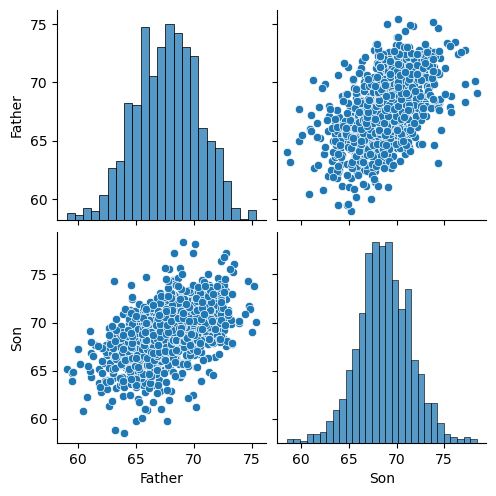

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

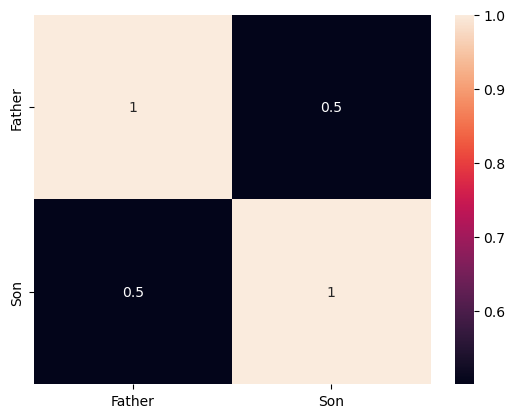

In [26]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# Split data

In [12]:
from sklearn.model_selection import train_test_split
x=data["Father"]
y=data["Son"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print("Length of x_train : ",len(x_train))
print("Length of y_train : ",len(y_train))
print("Length of x_test : ",len(x_test))
print("Length of y_test : ",len(y_test))

Length of x_train :  754
Length of y_train :  754
Length of x_test :  324
Length of y_test :  324


# Train data

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as  np
model=LinearRegression()
model.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

# Predict

In [18]:
y_pred=model.predict(np.array(x_test).reshape(-1,1))
print(y_pred)

[[69.06873954]
 [71.05683075]
 [68.40604247]
 [67.64139201]
 [67.43748522]
 [69.52752982]
 [69.27264633]
 [70.59804047]
 [69.47655313]
 [68.45701917]
 [70.34315699]
 [69.01776285]
 [69.68045992]
 [68.86483275]
 [68.55897257]
 [69.88436671]
 [69.57850652]
 [69.17069294]
 [67.38650852]
 [69.52752982]
 [67.08064833]
 [68.66092596]
 [70.19022689]
 [67.69236871]
 [67.59041531]
 [71.41366764]
 [67.8452988 ]
 [67.64139201]
 [68.76287936]
 [68.55897257]
 [69.22166964]
 [67.53943861]
 [68.50799587]
 [67.7433454 ]
 [67.28455513]
 [68.40604247]
 [69.88436671]
 [69.9863201 ]
 [69.78241331]
 [66.72381145]
 [69.68045992]
 [67.48846192]
 [67.38650852]
 [68.50799587]
 [67.99822889]
 [68.55897257]
 [69.52752982]
 [68.86483275]
 [65.80623089]
 [68.66092596]
 [69.17069294]
 [69.73143661]
 [66.77478815]
 [66.06111438]
 [70.49608708]
 [68.25311238]
 [64.58279015]
 [71.26073754]
 [69.57850652]
 [66.87674154]
 [69.88436671]
 [68.66092596]
 [67.69236871]
 [70.90390066]
 [69.22166964]
 [69.78241331]
 [66.97869

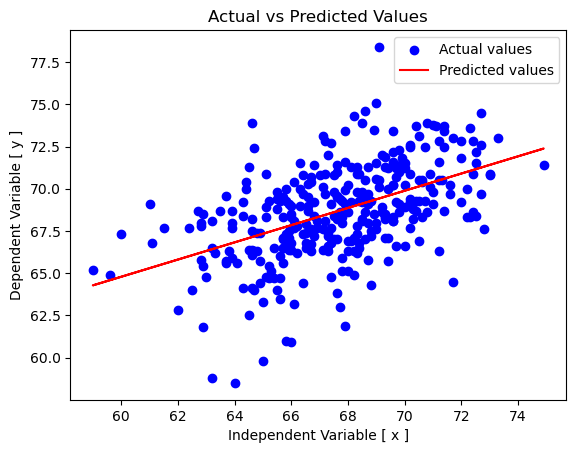

In [34]:
plt.scatter(x_test,y_test,color='blue', label='Actual values')
plt.plot(x_test,y_pred,color='red', label='Predicted values')
plt.xlabel('Independent Variable [ x ]')
plt.ylabel('Dependent Variable [ y ]')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Evaluation Metrics

In [23]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
model_mae=mean_absolute_error(y_test,y_pred)
model_mse=mean_squared_error(y_test,y_pred)
model_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
model_r2s=r2_score(y_test,y_pred)
train_score=model.score(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
test_score=model.score(np.array(x_test).reshape(-1,1),np.array(y_test).reshape(-1,1))
model_intercept=model.intercept_
model_coeff=model.coef_

print("Model intercept : ",model.intercept_)
print("Model coefficient : ",model.coef_)
print("Train score : ",train_score)
print("Test score : ",test_score)
print("R2 score error : ",model_r2s)
print("Mean absolute error : ",model_mae)
print("Mean squared error : ",model_mse)
print("Root Mean square error : ",model_rmse)

Model intercept :  [34.20067834]
Model coefficient :  [[0.50976698]]
Train score :  0.24999656304646412
Test score :  0.2529682734113303
R2 score error :  0.2529682734113303
Mean absolute error :  1.9103067768498037
Mean squared error :  5.992046898568368
Root Mean square error :  2.447865784426991
